<a href="https://colab.research.google.com/github/patbpm/Hamoye_quiz/blob/master/Hamoye_stage_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing the Data**

In [23]:

#Data of the africa food production and food supply
url = 'https://raw.githubusercontent.com/patbpm/Hamoye_quiz/master/Africa%20Food%20Production%20(2004%20-%202013).csv'
url_2 = 'https://raw.githubusercontent.com/patbpm/Hamoye_quiz/master/Africa%20Food%20Supply%20(2004%20-%202013).csv'

africa_food_prod_data_df = pd.read_csv(url)
africa_food_supply_data_df = pd.read_csv(url_2)

**DATA EDA**

In [3]:
africa_food_prod_data_df.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [24]:
africa_food_supply_data_df.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [4]:
africa_food_prod_data_df.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [25]:
africa_food_supply_data_df.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [5]:
africa_food_prod_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [26]:
africa_food_supply_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [6]:
africa_food_prod_data_df.columns

Index(['Country', 'Item', 'Year', 'Value'], dtype='object')

In [27]:
africa_food_supply_data_df.columns

Index(['Country', 'Year', 'Value'], dtype='object')

In [7]:
africa_food_prod_data_df.shape

(23110, 4)

In [28]:
africa_food_supply_data_df.shape

(450, 3)

In [9]:
africa_food_prod_data_df.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [29]:
africa_food_supply_data_df.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [10]:
#Grouping Datasets for food production by country and year

africa_food_prod_data_df.groupby(["Country", "Year"])["Value"].sum()
grouped_africa_food_prod_data_df = pd.DataFrame(africa_food_prod_data_df)
grouped_africa_food_prod_data_df

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [38]:
#Grouping Datasets for food supply by country and year

africa_food_supply_data_df.groupby(["Country", "Year"])["Value"].sum()
grouped_africa_food_supply_data_df = pd.DataFrame(africa_food_supply_data_df)
grouped_africa_food_supply_data_df

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [11]:
grouped_africa_food_prod_data_df.shape

(23110, 4)

In [39]:
grouped_africa_food_supply_data_df.shape


(450, 3)

[Text(0.5, 1.0, 'Food Producing Countries')]

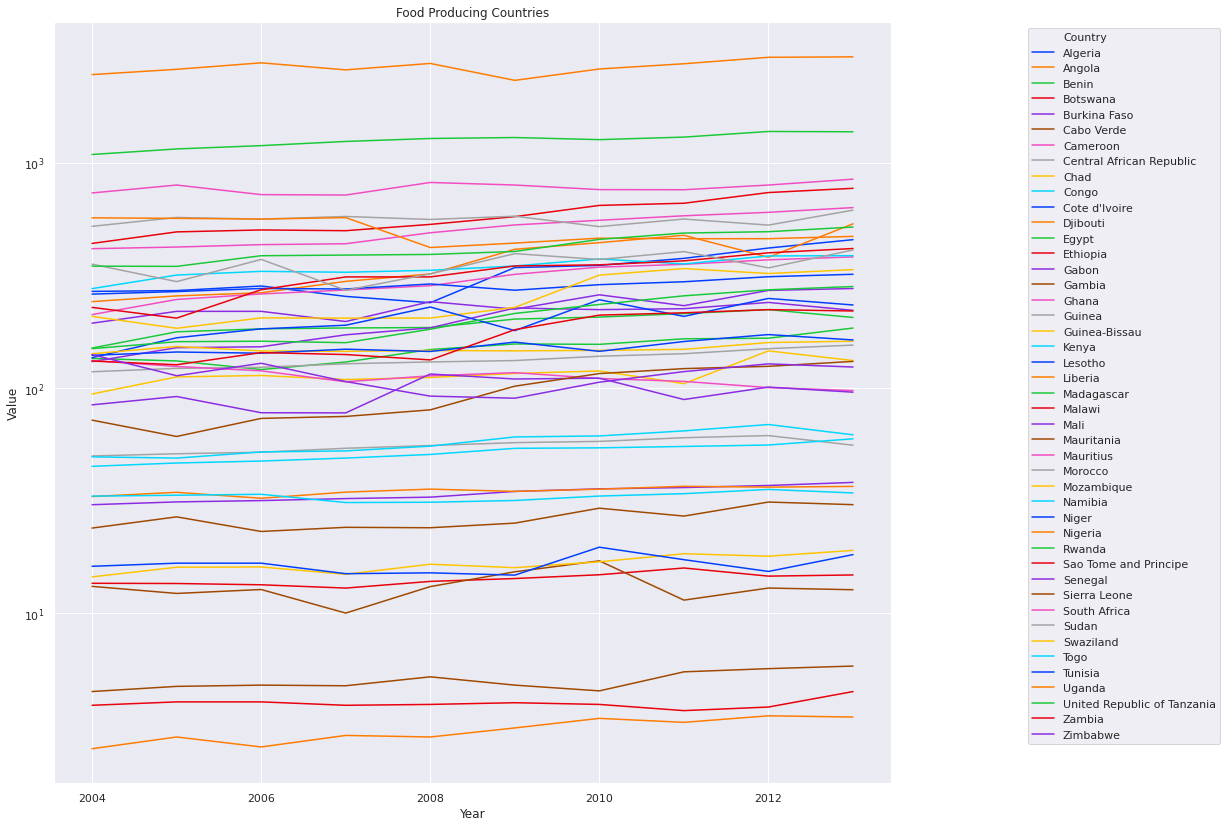

In [14]:
# The plot will show the trend in food production between 2004 and 2013

sns.set(rc = {'figure.figsize':(15,14)})
trend_grouped_africa_food_prod_data_df = sns.lineplot(x=grouped_africa_food_prod_data_df["Year"], y=grouped_africa_food_prod_data_df["Value"], hue=grouped_africa_food_prod_data_df["Country"], palette = 'bright', ci = None, data=grouped_africa_food_prod_data_df)
trend_grouped_africa_food_prod_data_df.set_yscale('log')
trend_grouped_africa_food_prod_data_df.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
trend_grouped_africa_food_prod_data_df.set(Title =  'Food Producing Countries')

 The graphs shows clearely that Nigeria, Egypt and South Africa have consistently, respectively been the top three food producing countries in Africa

[Text(0.5, 1.0, 'Food Supply Countries')]

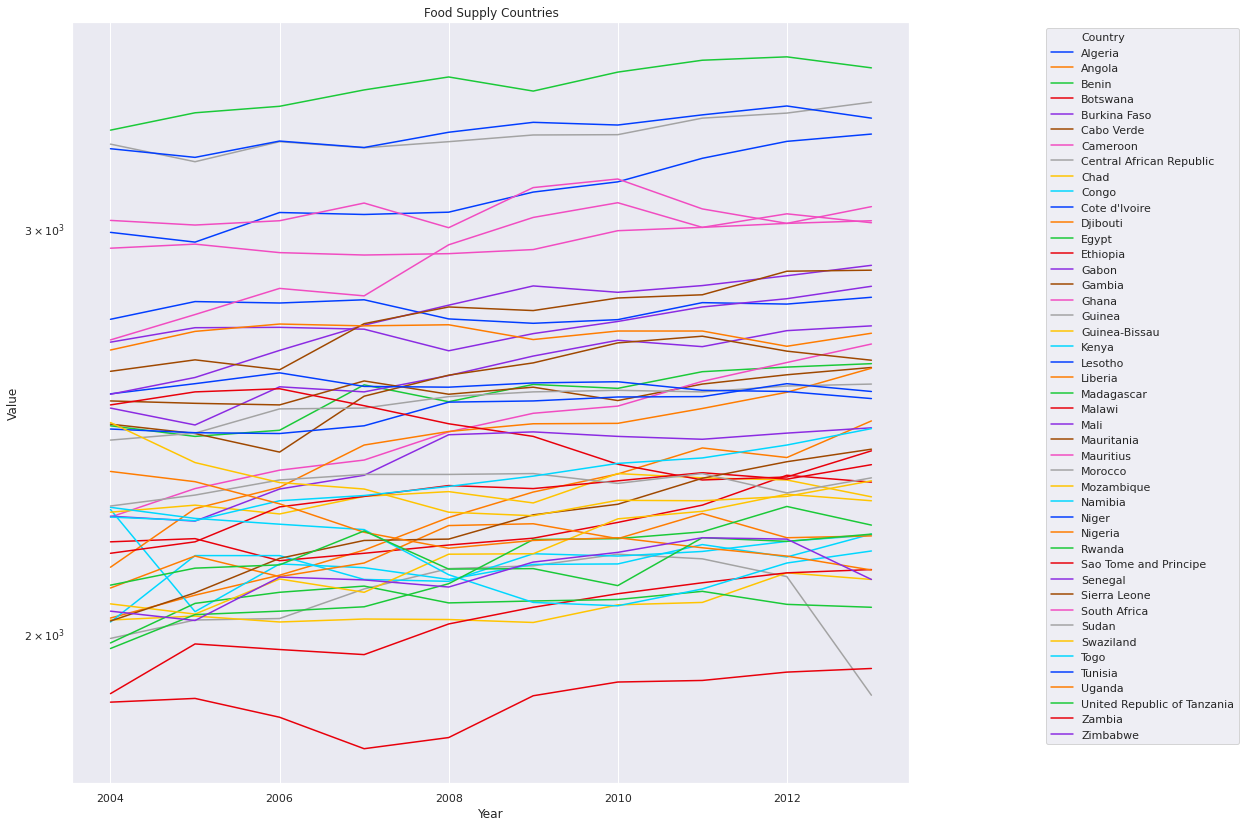

In [40]:
# The plot will show the trend in food supply between 2004 and 2013

sns.set(rc = {'figure.figsize':(15,14)})
trend_grouped_africa_food_supply_data_df = sns.lineplot(x=grouped_africa_food_supply_data_df["Year"], y=grouped_africa_food_supply_data_df["Value"], hue=grouped_africa_food_supply_data_df["Country"], palette = 'bright', ci = None, data=grouped_africa_food_supply_data_df)
trend_grouped_africa_food_supply_data_df.set_yscale('log')
trend_grouped_africa_food_supply_data_df.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
trend_grouped_africa_food_supply_data_df.set(Title =  'Food Supply Countries')

In [41]:
# This is the Map View Food Producting Countries



map_grouped_africa_food_prod_data_df = px.choropleth(grouped_africa_food_prod_data_df, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
map_grouped_africa_food_prod_data_df.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
map_grouped_africa_food_prod_data_df.show()

In [42]:
# This is the Map View Food Supplying Countries


map_grouped_africa_food_supply_data_df = px.choropleth(grouped_africa_food_supply_data_df, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
map_grouped_africa_food_supply_data_df.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
map_grouped_africa_food_supply_data_df.show()

In [44]:

africa_food_supply_data_df.groupby(['Year', 'Value']).sum()

Country
Year Value                          
2004 1866                     Zambia
     1882                   Ethiopia
     1969                     Rwanda
     1980                 Madagascar
     1989   Central African Republic
...                              ...
2013 3065                  Mauritius
     3296                    Algeria
     3349                    Tunisia
     3403                    Morocco
     3522                      Egypt

[439 rows x 1 columns]

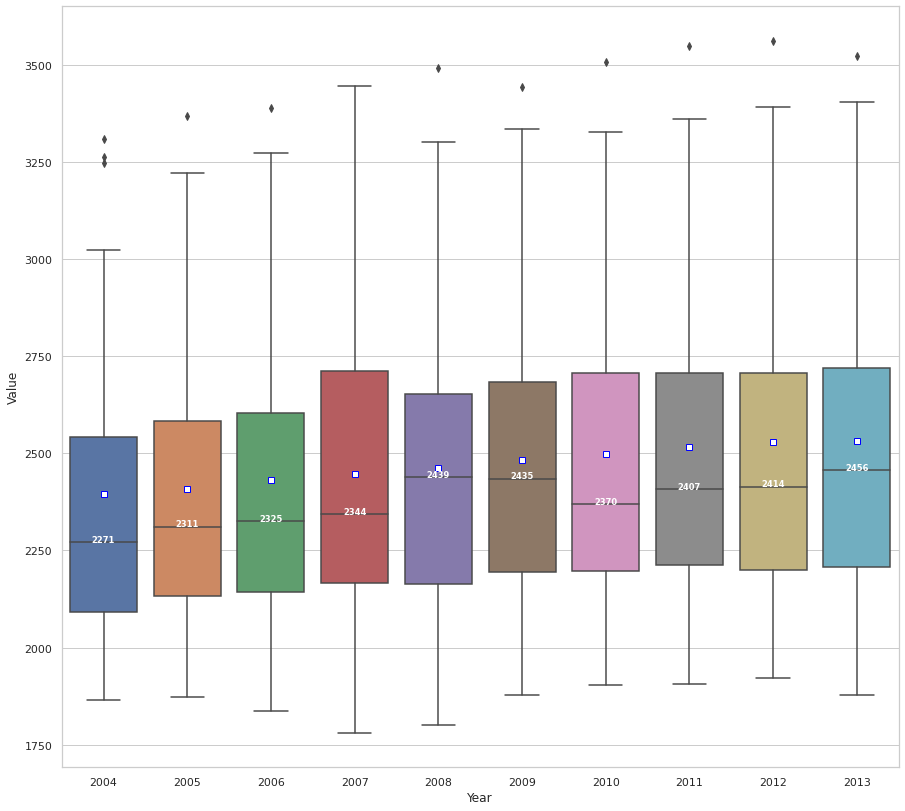

In [45]:
# we create a boxplot of the food supply data (africa_food_supply_data_df) for each year.
sns.set_style("whitegrid")
ax = sns.boxplot(x="Year", y="Value", data=africa_food_supply_data_df, showmeans=True,
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

medians = africa_food_supply_data_df.groupby(['Year'])['Value'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [49]:
fig = px.scatter(africa_food_supply_data_df, x='Country', y='Value',  )

#add two horizontal lines
fig.update_layout(width=1000, height=800, autosize=False, shapes =[
    dict(type='line', xref ='paper', x0 = 0, x1 = 1, yref='y', y0=1439.5, y1=1439.5, line=dict(
    color = 'Blue', width=1)),
    #add mean, median, upperfence and lowerfence lines
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=3467.5, y1=3467.5, line=dict(
    color = 'Red', width=1)),
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=2527.6444444444446, y1=2527.6444444444446, line=dict(
    color = 'Green', width=1)),
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=2414.0, y1=2414.0, line=dict(
    color = 'Purple', width=1))], showlegend=False)

fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels=False)

fig.show()

In [59]:
# Oats Production Dataset

oats_data = africa_food_prod_data_df[africa_food_prod_data_df['Item'] == 'Oats']
oats_data.head(50)

,Country,Item,Year,Value
40,Algeria,Oats,2004,89
41,Algeria,Oats,2005,78
42,Algeria,Oats,2006,89
43,Algeria,Oats,2007,92
44,Algeria,Oats,2008,27
45,Algeria,Oats,2009,96
46,Algeria,Oats,2010,88
47,Algeria,Oats,2011,67
48,Algeria,Oats,2012,110
49,Algeria,Oats,2013,113


In [60]:
#Groups by year

oats_data.groupby('Year').mean().reset_index()

,Year,Value
0,2004,20.888889
1,2005,21.222222
2,2006,21.777778
3,2007,20.222222
4,2008,12.444444
5,2009,21.888889
6,2010,23.666667
7,2011,31.666667
8,2012,30.444444
9,2013,28.222222


In [61]:
oats_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 40 to 22519
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  90 non-null     object
 1   Item     90 non-null     object
 2   Year     90 non-null     int64 
 3   Value    90 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.5+ KB


In [62]:
#Map Showing amount of oat produced per country from 2004 t0 2013

map_oats_data = px.choropleth(oats_data, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
map_oats_data.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
map_oats_data.show()

In [64]:
#Map Showing amount of rice produced per country from 2004 t0 2013
rice_data = africa_food_prod_data_df[africa_food_prod_data_df['Item'] == 'Rice (Milled Equivalent)'] 
rice_data.groupby('Year').mean().reset_index()



map_rice_data = px.choropleth(rice_data, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
map_rice_data.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
map_rice_data.show()